# Number Detection with Logistic Regression

This notebook demonstrates the basics of digit recognition using logistic regression. We'll use the famous MNIST dataset to classify handwritten digits (0-9).

## What is Logistic Regression?

Logistic regression is a statistical method used for binary and multiclass classification. Unlike linear regression that predicts continuous values, logistic regression predicts the probability that an instance belongs to a particular class.

### Key Concepts:
- **Sigmoid Function**: Maps any real number to a value between 0 and 1
- **Decision Boundary**: The threshold (usually 0.5) that separates classes
- **Maximum Likelihood Estimation**: Method used to find the best parameters

## 1. Import Required Libraries

We'll need several libraries for data manipulation, visualization, and machine learning.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load and Explore the MNIST Dataset

The MNIST dataset contains 70,000 images of handwritten digits (0-9). Each image is 28x28 pixels, resulting in 784 features per image.

### Why MNIST?
- **Standard benchmark**: Widely used in machine learning
- **Manageable size**: Not too large for learning purposes
- **Clear problem**: Digit recognition is intuitive to understand

In [3]:
# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X, y = mnist.data, mnist.target.astype(int)

print(f"Dataset shape: {X.shape}")
print(f"Labels shape: {y.shape}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Classes: {np.unique(y)}")

Loading MNIST dataset...
Dataset shape: (70000, 784)
Labels shape: (70000,)
Number of classes: 10
Classes: [0 1 2 3 4 5 6 7 8 9]


## 3. Data Visualization

Let's visualize some sample digits to understand what our data looks like.

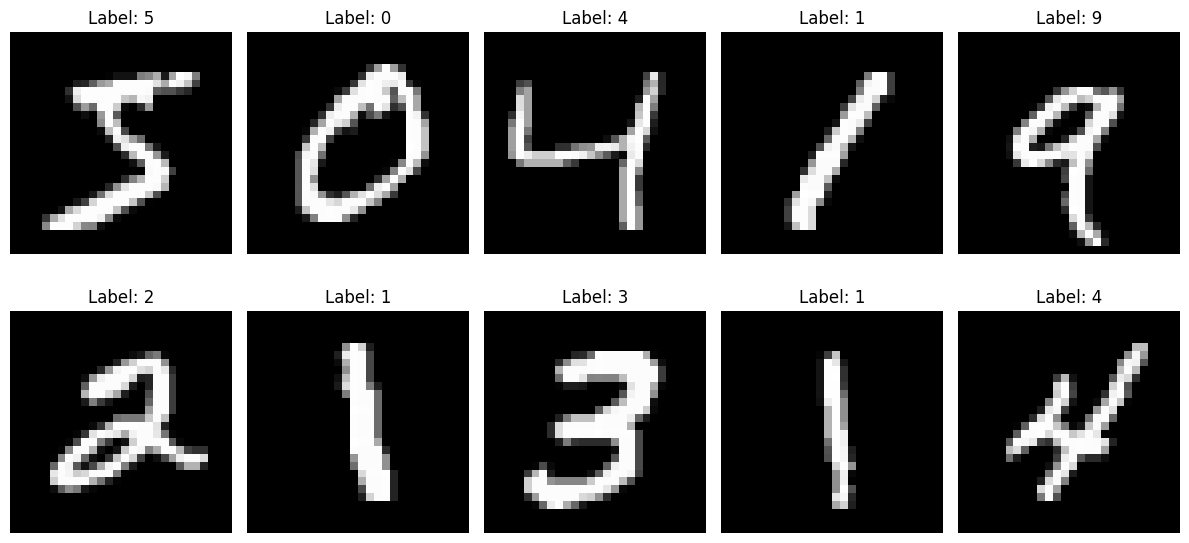

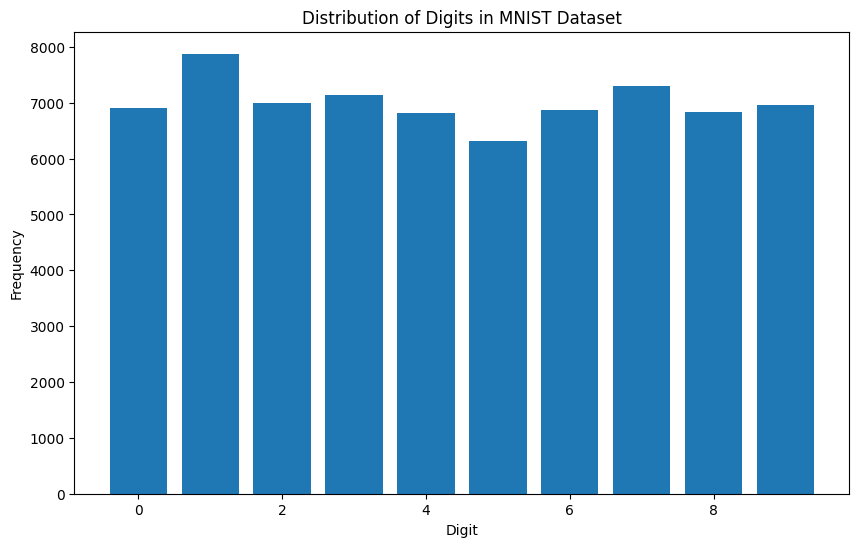

The dataset is relatively balanced across all digits.


In [4]:
# Function to plot sample digits
def plot_digits(X, y, num_samples=10):
    fig, axes = plt.subplots(2, 5, figsize=(12, 6))
    axes = axes.ravel()
    
    for i in range(num_samples):
        # Reshape the flattened image back to 28x28
        image = X[i].reshape(28, 28)
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f'Label: {y[i]}')
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Plot first 10 digits
plot_digits(X, y)

# Check the distribution of labels
plt.figure(figsize=(10, 6))
unique, counts = np.unique(y, return_counts=True)
plt.bar(unique, counts)
plt.xlabel('Digit')
plt.ylabel('Frequency')
plt.title('Distribution of Digits in MNIST Dataset')
plt.show()

print("The dataset is relatively balanced across all digits.")

## 4. Data Preprocessing

Before training our model, we need to preprocess the data:

### Why Preprocess?
- **Normalization**: Pixel values range from 0-255; we'll scale to 0-1
- **Feature Scaling**: Helps logistic regression converge faster
- **Data Splitting**: Separate training and testing sets

In [5]:
# Normalize pixel values to range [0, 1]
X_normalized = X / 255.0

print(f"Original pixel value range: [{X.min()}, {X.max()}]")
print(f"Normalized pixel value range: [{X_normalized.min()}, {X_normalized.max()}]")

# Use a subset of data for faster training (optional)
# For full dataset, remove this line
subset_size = 10000
X_subset = X_normalized[:subset_size]
y_subset = y[:subset_size]

print(f"Using subset of {subset_size} samples for faster training")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_subset, y_subset, test_size=0.2, random_state=42, stratify=y_subset
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Original pixel value range: [0, 255]
Normalized pixel value range: [0.0, 1.0]
Using subset of 10000 samples for faster training
Training set size: 8000
Testing set size: 2000


## 5. Understanding Logistic Regression for Multiclass Classification

### How does Logistic Regression handle multiple classes?

Since we have 10 classes (digits 0-9), we'll use **One-vs-Rest (OvR)** strategy:
- Train 10 binary classifiers
- Each classifier distinguishes one digit from all others
- Final prediction: class with highest probability

### Mathematical Foundation:
- **Sigmoid function**: σ(z) = 1 / (1 + e^(-z))
- **Linear combination**: z = w₀ + w₁x₁ + w₂x₂ + ... + wₙxₙ
- **Probability**: P(y=1|x) = σ(z)

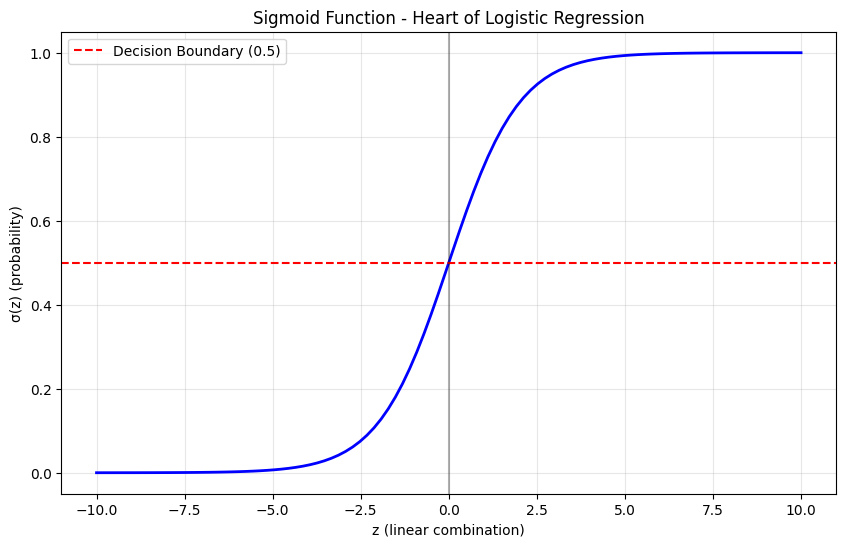

The sigmoid function maps any real number to a probability between 0 and 1.
When z > 0, probability > 0.5 (predict class 1)
When z < 0, probability < 0.5 (predict class 0)


In [6]:
# Visualize the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
y_sigmoid = sigmoid(z)

plt.figure(figsize=(10, 6))
plt.plot(z, y_sigmoid, 'b-', linewidth=2)
plt.axhline(y=0.5, color='r', linestyle='--', label='Decision Boundary (0.5)')
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.xlabel('z (linear combination)')
plt.ylabel('σ(z) (probability)')
plt.title('Sigmoid Function - Heart of Logistic Regression')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

print("The sigmoid function maps any real number to a probability between 0 and 1.")
print("When z > 0, probability > 0.5 (predict class 1)")
print("When z < 0, probability < 0.5 (predict class 0)")

## 6. Train the Logistic Regression Model

### Model Parameters:
- **max_iter**: Maximum number of iterations for optimization
- **multi_class**: Strategy for handling multiple classes
- **solver**: Algorithm used for optimization
- **random_state**: For reproducible results

In [7]:
# Create and train the logistic regression model
print("Training Logistic Regression model...")

# Initialize the model
log_reg = LogisticRegression(
    max_iter=1000,          # Increase if convergence warning appears
    multi_class='ovr',      # One-vs-Rest for multiclass
    solver='liblinear',     # Good for small datasets
    random_state=42
)

# Train the model
log_reg.fit(X_train, y_train)

print("Model training completed!")
print(f"Number of classes: {len(log_reg.classes_)}")
print(f"Classes: {log_reg.classes_}")

Training Logistic Regression model...
Model training completed!
Number of classes: 10
Classes: [0 1 2 3 4 5 6 7 8 9]


## 7. Model Evaluation

Let's evaluate our model's performance using various metrics:

### Evaluation Metrics:
- **Accuracy**: Percentage of correct predictions
- **Precision**: True positives / (True positives + False positives)
- **Recall**: True positives / (True positives + False negatives)
- **F1-Score**: Harmonic mean of precision and recall

In [8]:
# Make predictions
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.9085 (90.85%)

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       200
           1       0.93      0.97      0.95       225
           2       0.88      0.84      0.86       198
           3       0.90      0.87      0.88       206
           4       0.94      0.91      0.92       196
           5       0.86      0.85      0.85       173
           6       0.93      0.97      0.95       203
           7       0.91      0.93      0.92       214
           8       0.86      0.85      0.85       189
           9       0.89      0.89      0.89       196

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000



## 8. Confusion Matrix Visualization

A confusion matrix shows how well our model performs for each digit class.

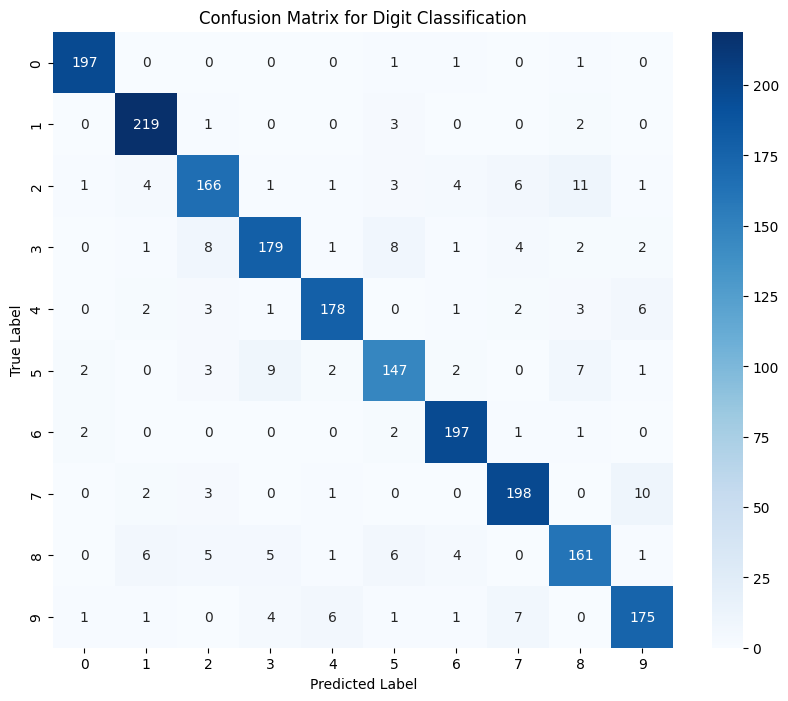

Confusion Matrix Interpretation:
- Diagonal elements: Correct predictions
- Off-diagonal elements: Misclassifications
- Darker colors indicate higher values


In [9]:
# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=log_reg.classes_, 
            yticklabels=log_reg.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Digit Classification')
plt.show()

print("Confusion Matrix Interpretation:")
print("- Diagonal elements: Correct predictions")
print("- Off-diagonal elements: Misclassifications")
print("- Darker colors indicate higher values")

## 9. Analyzing Model Predictions

Let's look at some specific predictions to understand how the model makes decisions.

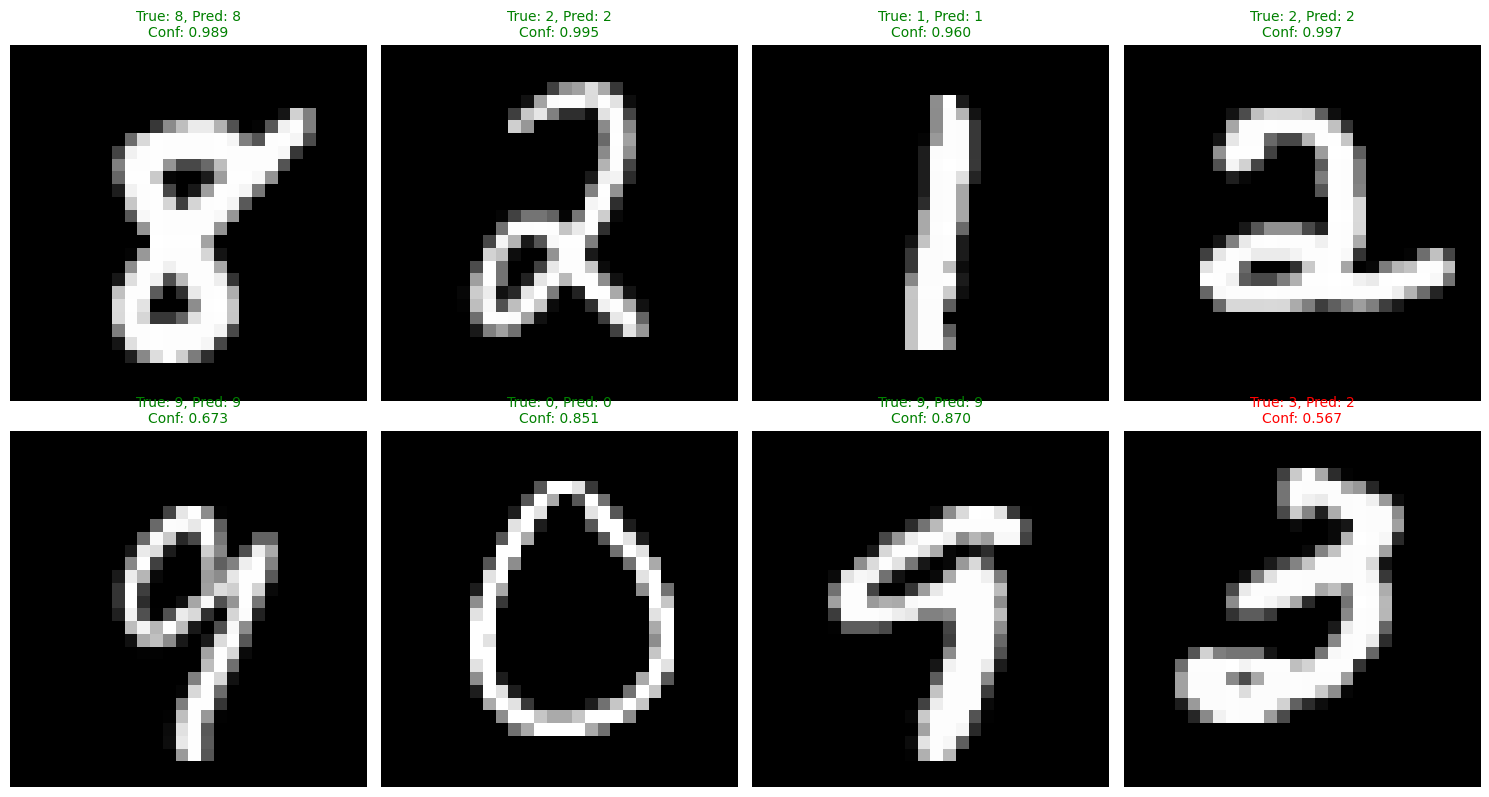

Green titles: Correct predictions
Red titles: Incorrect predictions
Conf: Model's confidence in its prediction


In [10]:
# Function to display predictions with probabilities
def show_predictions(X_test, y_test, y_pred, y_pred_proba, num_samples=8):
    fig, axes = plt.subplots(2, 4, figsize=(15, 8))
    axes = axes.ravel()
    
    for i in range(num_samples):
        # Reshape image
        image = X_test[i].reshape(28, 28)
        
        # Plot image
        axes[i].imshow(image, cmap='gray')
        
        # Get prediction and confidence
        true_label = y_test[i]
        pred_label = y_pred[i]
        confidence = y_pred_proba[i].max()
        
        # Color: green if correct, red if wrong
        color = 'green' if true_label == pred_label else 'red'
        
        axes[i].set_title(f'True: {true_label}, Pred: {pred_label}\nConf: {confidence:.3f}', 
                         color=color, fontsize=10)
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Show some predictions
show_predictions(X_test, y_test, y_pred, y_pred_proba)

print("Green titles: Correct predictions")
print("Red titles: Incorrect predictions")
print("Conf: Model's confidence in its prediction")

## 10. Understanding Model Weights

Logistic regression learns weights for each pixel. Let's visualize what the model has learned.

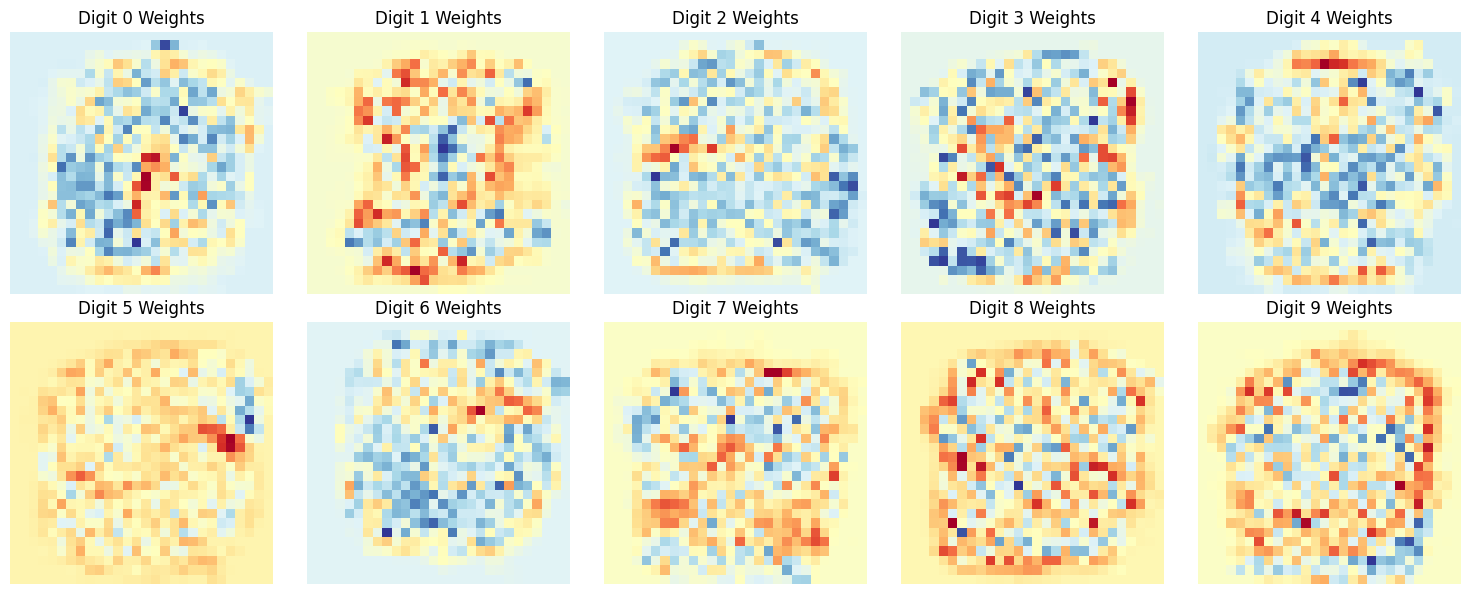

Weight Visualization Interpretation:
- Red/Yellow: Positive weights (contribute to predicting this digit)
- Blue: Negative weights (contribute against predicting this digit)
- You can see the shape patterns the model learned for each digit!


In [11]:
# Visualize learned weights for each digit
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

for i, digit in enumerate(log_reg.classes_):
    # Get weights for this digit classifier
    weights = log_reg.coef_[i].reshape(28, 28)
    
    # Plot weights
    im = axes[i].imshow(weights, cmap='RdYlBu', interpolation='nearest')
    axes[i].set_title(f'Digit {digit} Weights')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

print("Weight Visualization Interpretation:")
print("- Red/Yellow: Positive weights (contribute to predicting this digit)")
print("- Blue: Negative weights (contribute against predicting this digit)")
print("- You can see the shape patterns the model learned for each digit!")

## 11. Model Performance Analysis

Let's analyze which digits are easiest and hardest for our model to classify.

Per-Digit Performance:
   Digit  Precision  Recall  F1-Score  Support
0      0      0.970   0.985     0.978      200
1      1      0.932   0.973     0.952      225
2      2      0.878   0.838     0.858      198
3      3      0.899   0.869     0.884      206
4      4      0.937   0.908     0.922      196
5      5      0.860   0.850     0.855      173
6      6      0.934   0.970     0.952      203
7      7      0.908   0.925     0.917      214
8      8      0.856   0.852     0.854      189
9      9      0.893   0.893     0.893      196


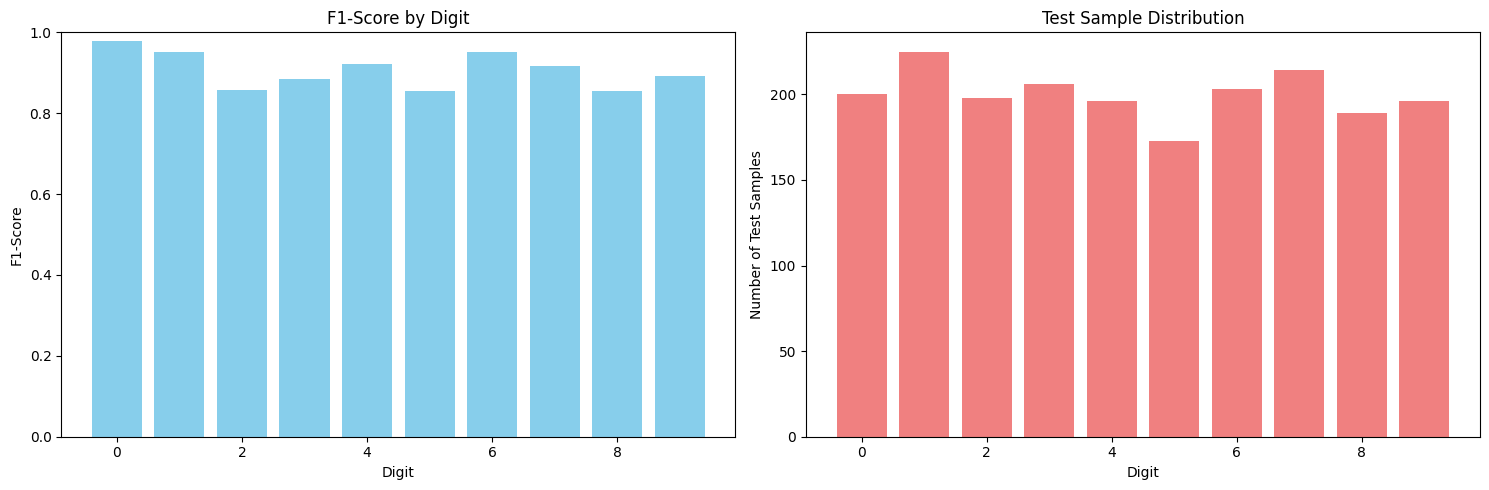


Best performing digit: 0 (F1-Score: 0.978)
Worst performing digit: 8 (F1-Score: 0.854)


In [12]:
# Calculate per-class accuracy
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred)

# Create performance dataframe
performance_data = {
    'Digit': log_reg.classes_,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'Support': support
}

import pandas as pd
perf_df = pd.DataFrame(performance_data)
print("Per-Digit Performance:")
print(perf_df.round(3))

# Plot performance metrics
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# F1-Score by digit
ax1.bar(perf_df['Digit'], perf_df['F1-Score'], color='skyblue')
ax1.set_xlabel('Digit')
ax1.set_ylabel('F1-Score')
ax1.set_title('F1-Score by Digit')
ax1.set_ylim(0, 1)

# Support (number of test samples) by digit
ax2.bar(perf_df['Digit'], perf_df['Support'], color='lightcoral')
ax2.set_xlabel('Digit')
ax2.set_ylabel('Number of Test Samples')
ax2.set_title('Test Sample Distribution')

plt.tight_layout()
plt.show()

# Find best and worst performing digits
best_digit = perf_df.loc[perf_df['F1-Score'].idxmax(), 'Digit']
worst_digit = perf_df.loc[perf_df['F1-Score'].idxmin(), 'Digit']

print(f"\nBest performing digit: {best_digit} (F1-Score: {perf_df.loc[perf_df['Digit']==best_digit, 'F1-Score'].values[0]:.3f})")
print(f"Worst performing digit: {worst_digit} (F1-Score: {perf_df.loc[perf_df['Digit']==worst_digit, 'F1-Score'].values[0]:.3f})")

## 12. Key Insights and Limitations

### What We Learned:
1. **Logistic Regression Basics**: Successfully applied to multiclass classification
2. **Feature Importance**: Model learns which pixels are important for each digit
3. **Performance Trade-offs**: Some digits are harder to classify than others

### Limitations of Logistic Regression for Image Classification:
1. **Linear Decision Boundaries**: Cannot capture complex patterns
2. **No Spatial Awareness**: Treats each pixel independently
3. **Feature Engineering**: Requires manual feature selection

### When to Use Logistic Regression:
- ✅ Simple, interpretable baseline
- ✅ Fast training and prediction
- ✅ Good with limited data
- ✅ When you need probability estimates

### When to Consider Alternatives:
- ❌ Complex image patterns
- ❌ Need for spatial feature learning
- ❌ Very high-dimensional data
- ❌ Non-linear relationships

## 13. Next Steps and Improvements

### Possible Improvements:
1. **Feature Engineering**: Extract edges, corners, or other meaningful features
2. **Regularization**: Use L1 or L2 regularization to prevent overfitting
3. **Cross-Validation**: More robust performance estimation
4. **Hyperparameter Tuning**: Optimize solver, regularization strength

### Advanced Alternatives:
- **Random Forest**: Ensemble method for better performance
- **Support Vector Machines**: Better handling of non-linear patterns
- **Neural Networks**: Deep learning for automatic feature learning
- **Convolutional Neural Networks**: Specialized for image data

In [13]:
# Summary of our logistic regression model
print("=" * 50)
print("MNIST DIGIT CLASSIFICATION SUMMARY")
print("=" * 50)
print(f"Dataset: {X.shape[0]:,} images, {X.shape[1]} features per image")
print(f"Training samples: {X_train.shape[0]:,}")
print(f"Test samples: {X_test.shape[0]:,}")
print(f"Model: Logistic Regression (One-vs-Rest)")
print(f"Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Number of model parameters: {log_reg.coef_.size + log_reg.intercept_.size:,}")
print("=" * 50)

print("\nCongratulations! You've successfully implemented digit recognition using logistic regression.")
print("This is a fundamental stepping stone towards more advanced machine learning techniques!")

MNIST DIGIT CLASSIFICATION SUMMARY
Dataset: 70,000 images, 784 features per image
Training samples: 8,000
Test samples: 2,000
Model: Logistic Regression (One-vs-Rest)
Test Accuracy: 0.9085 (90.85%)
Number of model parameters: 7,850

Congratulations! You've successfully implemented digit recognition using logistic regression.
This is a fundamental stepping stone towards more advanced machine learning techniques!
